In [1]:
import cv2
import random
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

from src.utils.utils_generate_samples import *
from src.utils.utils_viz import *

### Data Generation & Analysis

This notebook provides a visualization of objects with varying parameters for size, position, and rotation angle (for squares). **Key takeaways from the visualization:**

- **Minimum/Maximum permissible object size:** 3 and 32 pixels.
- **Minimum square size for rotation:** 6 pixels. Smaller objects lose their square shape when rotated.
- **Rotation angle:** For generation, we will use a random rotation angle for squares drawn from the range $[0, 90)$. However, on average for different square sizes, rotations are visually distinguishable with a 3-degree step. This information will be used to estimate the number of distinct samples below.

#### Train/Val/Test Split

Since the data are synthetic, we can generate an infinite training set; however, this would lead to an incorrect evaluation of the model’s performance. To avoid this, we will limit the size of the training set.

Let’s estimate the number of possible distinct samples:
- **Object sizes:** $s \in \{3, ..., 32\}$
- **Possible positions:** $x, y \in \{0, ..., 32 - 2s\}$, so that the object fits entirely.
- **Rotations for squares (in 3-degree steps):** $\alpha \in \{0, 3, 6, ..., 87\}$

Then, the number of unique positions, sizes, and rotations is:
$$ N_{circle} = \sum_{s=3}^{32} (32-s+1)^2 = 9.5k $$
$$ N_{square} = \sum_{s=3}^{5} (32-s+1)^2 + \sum_{s=6}^{32} (32-s+1)^2 \times 30 = 210.4k $$

We will limit the datasets as follows:
- **Train:** 5k squares and 5k circles. 
- **Validation:** 1k squares and 1k circles. 
- **Test:** 50k squares and 50k circles. Pairs will be formed in a fixed manner.

To ensure that the train, validation, and test sets do not overlap, **we will store the sample generation parameters**. This approach will save memory, as it does not require storing the actual images.


### Data Visualisation

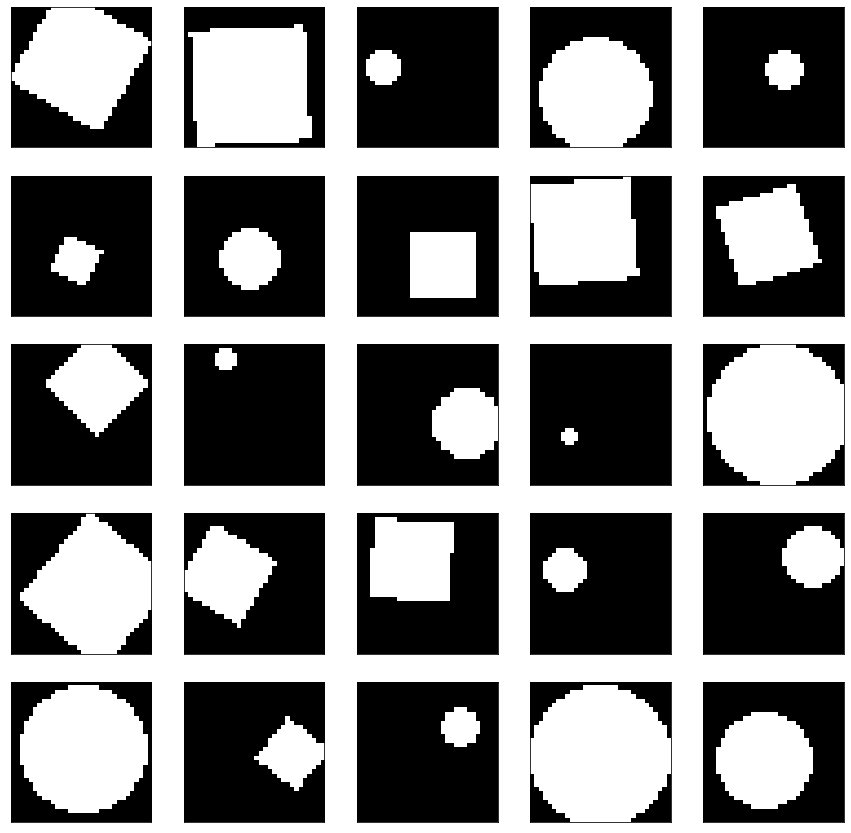

In [4]:
plot_samples(num_rows=5, num_cols=5, size=None)

### Different sizes

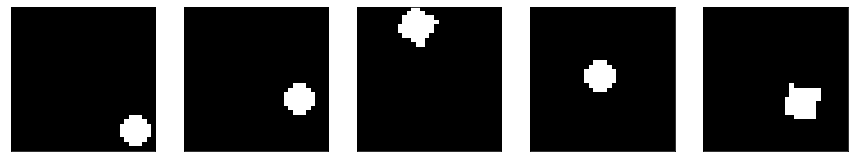

In [5]:
plot_samples(num_rows=1, num_cols=5, size=6)

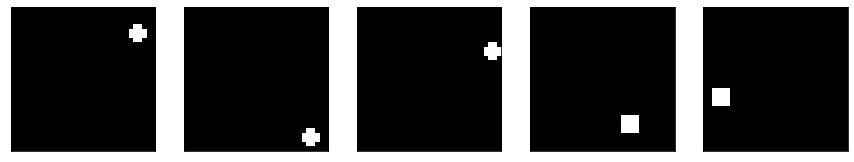

In [6]:
plot_samples(num_rows=1, num_cols=5, size=3)

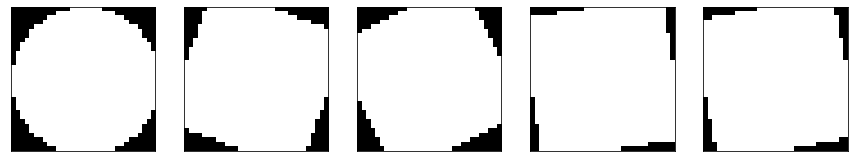

In [7]:
plot_samples(num_rows=1, num_cols=5, size=32)

### Explore rotation

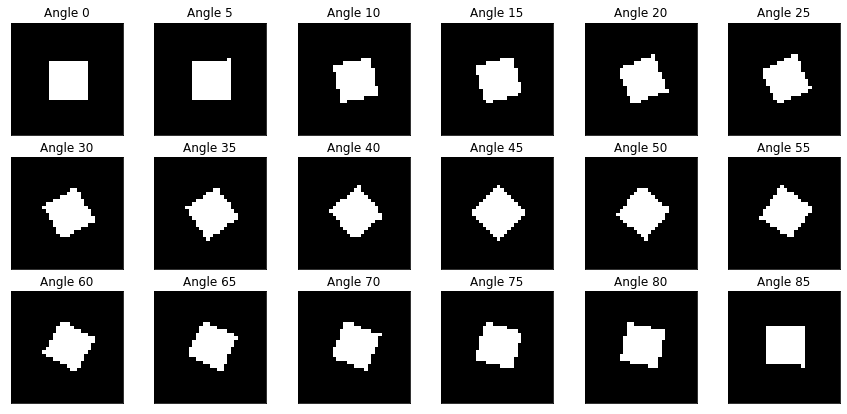

In [9]:
plot_rotated_squares(angle_step=5, size=10)

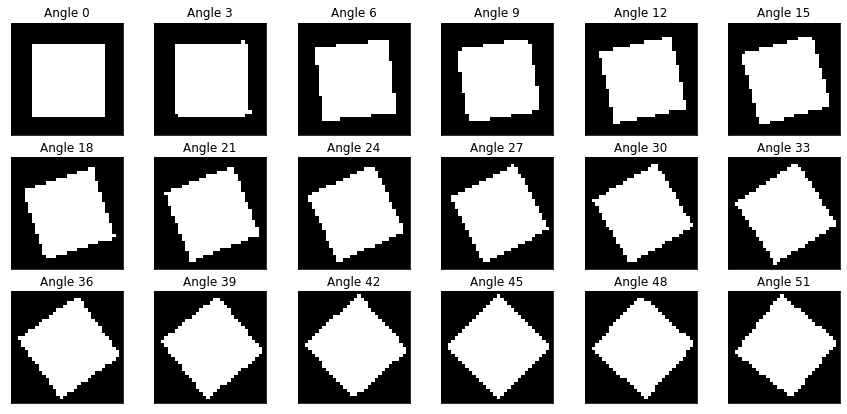

In [10]:
plot_rotated_squares(angle_step=3, size=20)

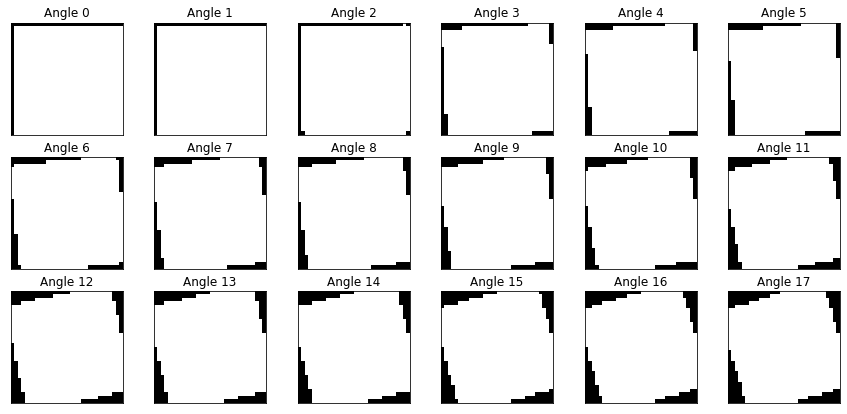

In [11]:
plot_rotated_squares(angle_step=1, size=30)

### Train/Val/Test
Generate all possible combinations and apply train/val/split.

**Note**, that for small and big shape size we have fewer number of samples beacuse of the range of possible locations. Expected result: the model will have problems with this sizes. Possible improvement: For better split, it is better to balance samples for each size.

In [13]:
### Generate all posible combinations of parameters:

df = generate_samples_dataframe()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 231803/231803 [00:00<00:00, 2171941.53it/s]


In [14]:
df['shape'].value_counts()

square    221853
circle      9950
Name: shape, dtype: int64

In [15]:
### Imbalance for different shape size
df[df['shape'] == "square"]['size'].value_counts()

6     21870
7     21870
8     18750
9     18750
10    15870
11    15870
12    13230
13    13230
14    10830
15    10830
16     8670
17     8670
19     6750
18     6750
20     5070
21     5070
22     3630
23     3630
25     2430
24     2430
26     1470
27     1470
3       961
4       841
5       841
28      750
29      750
30      270
31      270
32       30
Name: size, dtype: int64

In [16]:
### Create train/val/test split
df = create_train_val_test_split(df, seed=41)

output_file = 'data/train_val_test_split.csv'
df.to_csv(output_file, index=False)

In [17]:
df.split.value_counts()

test     217803
train     10000
val        4000
Name: split, dtype: int64

In [18]:
df[df.split == 'train']['shape'].value_counts()

circle    5000
square    5000
Name: shape, dtype: int64